So, here's the story of the people who are travelling to a destination from various HomePlanets.
But sadly they met with a unexpected accident and some people got transported from the ship. So our job is to find if a person with some details can be transported or stayed in ship.

Let's not wait any minute,

We need some packages to be imported and they are imported here, some may be imported later in the notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Our data is brought into the book by these statements.

In [3]:
og_train_data = pd.read_csv('train.csv')
og_test_data  = pd.read_csv('test.csv')

data = og_train_data

Let's take a peek at the data.

In [4]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


The data types of the attributes are as follows.

In [6]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

#### Are there any duplicated rows in the data?

In [7]:
data[data.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


* There are no duplicated rows in the data

#### How does the data can be described?

In [8]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Are there any missing values in the data? If so, then how many?

In [9]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### What is the shape of the data?

In [10]:
data.shape

(8693, 14)

#### columns are:

In [11]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

#### How many unique values are there for the features?

In [12]:
data.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

* I think we can say that the transportation doesn't depend on the 'PassengerId' and 'Name' of the people.
* So, I am going to remove them from the data and store it in a new DataFrame.

In [13]:
lowDim_data = data.drop(columns = ['PassengerId', 'Name'])

In [14]:
lowDim_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


Let's see that how many are from each HomePlanet 

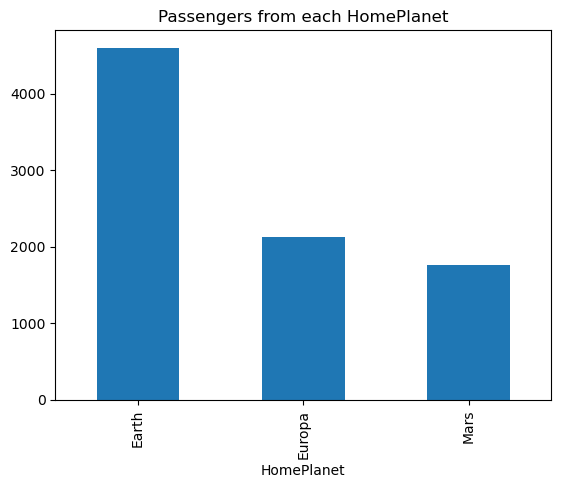

In [15]:
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center')
ax = data['HomePlanet'].value_counts() \
                  .plot(kind = 'bar', title = 'Passengers from each HomePlanet')
# ax.addlabels()
plt.show()

In [16]:
data['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

##### Maximum people are from Earth. Europa and Mars passengers are close in numbers but far less than the number from earth.

#### Where do the passengers want to go?

<Axes: title={'center': 'Destination of people'}, xlabel='Destination'>

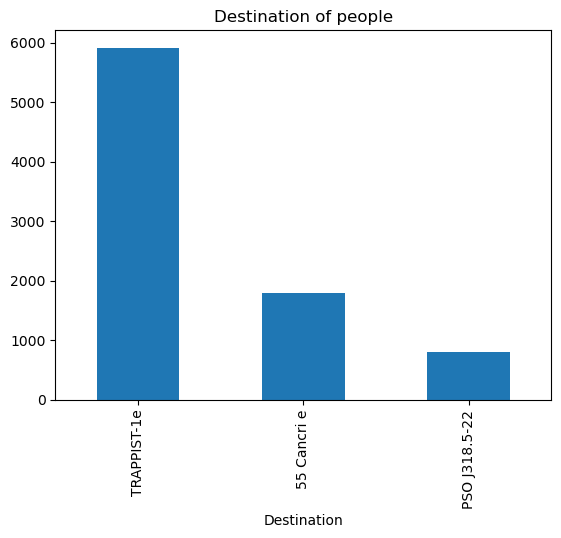

In [17]:
data['Destination'].value_counts().plot(kind = 'bar', title = 'Destination of people')

I'm going to fill the Null values of HomePlanet and Destination with Mode of the Cols

In [18]:
data['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

* Maximum people are going to the `TRAPPIST-1e`

In [19]:
lowDim_data['HomePlanet'].fillna('Earth', inplace=True)
lowDim_data['Destination'].fillna('TRAPPIST-1e', inplace=True)

#### So, how many people are in CryoSleep?

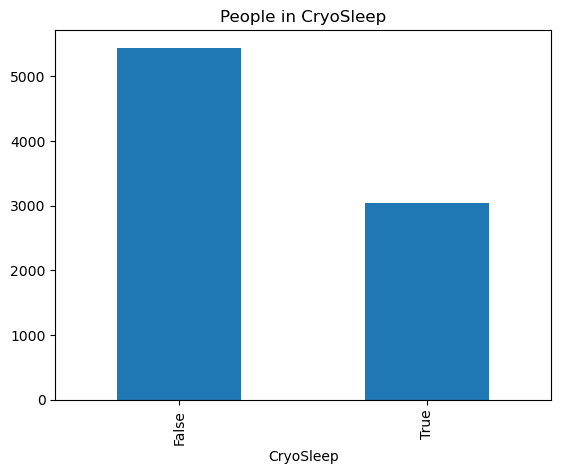

<Figure size 1000x1000 with 0 Axes>

In [20]:
data['CryoSleep'].value_counts().plot(kind = 'bar', title = 'People in CryoSleep')
plt.figure(figsize = (10, 10))
plt.show()

In [21]:
data['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

More people are `not` in CryoSleep

#### What is the age distribution in passengers?

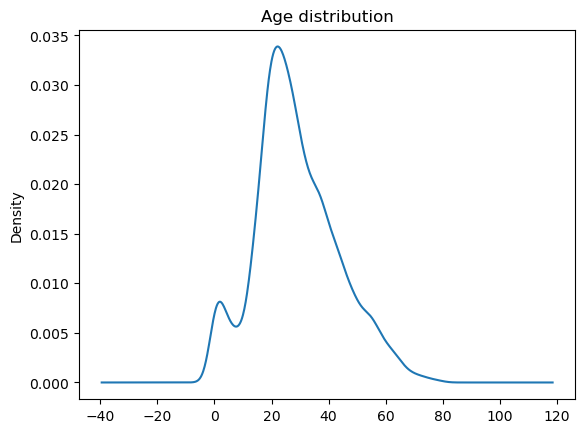

In [22]:
data['Age'].plot(kind = 'kde', title = 'Age distribution', x = 'Age')
plt.show()

In [23]:
data['Age'].value_counts().head(20)

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
22.0    291
20.0    277
26.0    268
28.0    267
27.0    259
25.0    243
29.0    230
31.0    202
32.0    199
30.0    183
33.0    178
36.0    178
0.0     178
37.0    177
35.0    171
Name: count, dtype: int64

We can observe that most people are of from range (15 - 40) approximately.

#### How many got transported?

In [24]:
data['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

* Nearly `Half` of the people got transported.

I'm converting some columns data types to the appropriate types. Because `CryoSleep` and `VIP` are actually boolean but in the dataset they are observed as object datatype.

In [25]:
lowDim_data['CryoSleep'] = lowDim_data['CryoSleep'].astype('bool')
lowDim_data['VIP'] = lowDim_data['VIP'].astype('bool')

And also converting `HomePlane, Cabin, Destination` to string datatype which are in object datatype.

In [26]:
for i in ['HomePlanet', 'Cabin', 'Destination']:
        lowDim_data[i] = lowDim_data[i].astype('str')

* Checking that how many `null` values are there

In [27]:
lowDim_data.isna().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

Now i'm going to fill these null values with their median, cause median gives us the middle value of data which is not effected by the outliers.

Note that i `didn't` removed the outliers.

In [28]:
for i in ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    lowDim_data[i] = lowDim_data[i].fillna(float(lowDim_data[i].median()))

Again checking the data for the Null values.

In [29]:
lowDim_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Now there are no `Null` values in the data.

##### Encoding the columns of the dataframe

That is i'm converting the string type values to numerical values for the implementation of the model.

In [30]:

from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# df['species'].unique() 
for i in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP','Transported']:
    lowDim_data[i] = label_encoder.fit_transform(lowDim_data[i])

checking the datatypes of the data before model fitting.

In [31]:
lowDim_data.dtypes

HomePlanet        int32
CryoSleep         int64
Cabin             int32
Destination       int32
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

#### This is how our data looks after the encoding

In [32]:
lowDim_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


#### How the variables are correlated?

In [33]:
lowDim_data.corr()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.083239,-0.470328,0.034737,0.133577,0.085260,0.211751,0.071454,0.101383,0.055047,0.039824,0.115461
CryoSleep,0.083239,1.000000,0.112433,-0.094061,-0.073406,-0.050342,-0.240750,-0.202675,-0.207213,-0.196893,-0.190437,0.451744
Cabin,-0.470328,0.112433,1.000000,0.117281,-0.236994,-0.094719,-0.073802,-0.260056,-0.067709,-0.180768,-0.210865,-0.052604
Destination,0.034737,-0.094061,0.117281,1.000000,-0.006771,-0.035430,0.045733,-0.111057,0.024721,-0.055815,-0.073293,-0.108152
Age,0.133577,-0.073406,-0.236994,-0.006771,1.000000,0.058490,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,0.085260,-0.050342,-0.094719,-0.035430,0.058490,1.000000,0.050354,0.088208,-0.000992,0.037896,0.087235,-0.024602
RoomService,0.211751,-0.240750,-0.073802,0.045733,0.068629,0.050354,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.071454,-0.202675,-0.260056,-0.111057,0.127390,0.088208,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.101383,-0.207213,-0.067709,0.024721,0.033148,-0.000992,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.055047,-0.196893,-0.180768,-0.055815,0.120946,0.037896,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545


<Axes: >

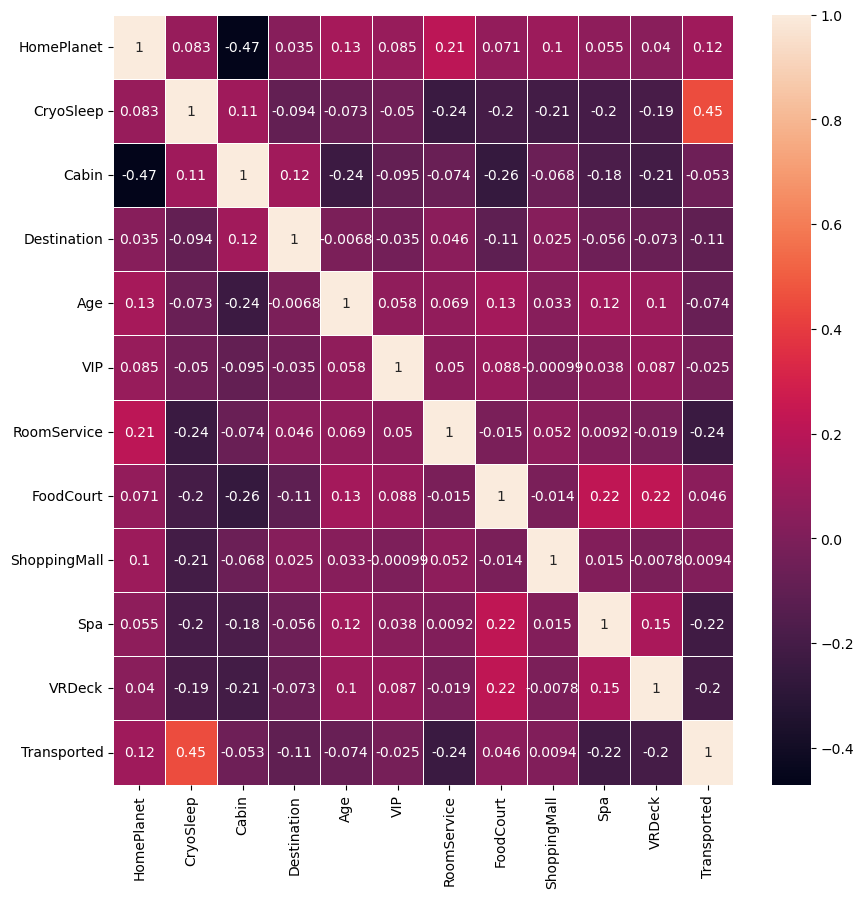

In [34]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(lowDim_data.corr(), annot = True, linewidths=.5, ax=ax)

From the correlation plot we can see that there are no seriously correlated variables in the data.
   The highest value is between `Cryosleep` and `Transported` with `0.45`

Splitting training data into train and validate datasets

In [35]:
x = lowDim_data.iloc[:, :-1]
y = lowDim_data.iloc[:, -1]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2)

In [37]:
y_validate.head()

6885    1
925     1
3861    0
4631    1
1558    0
Name: Transported, dtype: int64

We are using KNN classifier for our data, ofcourse there are other models but KNN is also a powerful model.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Importing the test data

In [39]:
test_data = pd.read_csv('test.csv')

In [40]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Now we'll do all the steps that are done on the train data for the test data to get the test data to the same state as the train data before fitting the model.

In [41]:
test_data.drop(columns=['PassengerId', 'Name'], inplace = True)

In [42]:
test_data.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [43]:
test_data.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [44]:
test_data['CryoSleep'] = test_data['CryoSleep'].astype('bool')
test_data['VIP'] = test_data['VIP'].astype('bool')

In [45]:
for i in ['HomePlanet', 'Cabin', 'Destination']:
        test_data[i] = test_data[i].astype('str')

In [46]:
test_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [47]:
for i in ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    test_data[i] = test_data[i].fillna(float(test_data[i].mode()))

C:\Users\91970\AppData\Local\Temp\ipykernel_27200\3196287623.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  test_data[i] = test_data[i].fillna(float(test_data[i].mode()))


In [48]:
test_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [49]:
# from sklearn import preprocessing 
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 


for i in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']:
    test_data[i] = label_encoder.fit_transform(test_data[i])

In [50]:
test_data.dtypes

HomePlanet        int32
CryoSleep         int64
Cabin             int32
Destination       int32
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [51]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0


This is how our test data looks after the process

#### Predicting the `Transported` values for the test data

In [52]:
knn.predict(test_data)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

Since i dont have the transported values for the test data(actual) i'm taking the validation data from the above splitting and calculate the acuracy score from it.

In [53]:
validate_y = knn.predict(x_validate)

This is how the values are predicted by our model

In [54]:
validate_y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

Total how many are Transported and not

In [55]:
validate_y = pd.DataFrame(validate_y) #converting the numpy array structure to pandas dataframe

In [56]:
validate_y.value_counts() # 1 means transported, 0 means not transported

1    872
0    867
Name: count, dtype: int64

This is how the actual validation data `Transported` values are:

In [57]:
y_validate.value_counts()  # 1 means transported, 0 means not transported

Transported
0    882
1    857
Name: count, dtype: int64

Formula for accuracy `accuracy = (number of correct predictions) / (total number of predictions)`

In [58]:
y_validate = np.array(y_validate)
validate_y = np.array(validate_y)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
print(f"Our model Accuracy is : {accuracy_score(y_validate, validate_y)} which is not so bad, because we didn't removed the outliers and didn't tuned our    hyperparameters")

Our model Accuracy is : 0.7429557216791259 which is not so bad, because we didn't removed the outliers and didn't tuned our    hyperparameters
